## 📖 Background
You work for an international HR consultancy helping companies attract and retain top talent in the competitive tech industry. As part of your services, you provide clients with insights into industry salary trends to ensure they remain competitive in hiring and compensation practices.

Your team wants to use a data-driven approach to analyse how various factors—such as job role, experience level, remote work, and company size—impact salaries globally. By understanding these trends, you can advise clients on offering competitive packages to attract the best talent.

In this competition, you’ll explore and visualise salary data from thousands of employees worldwide. f you're tackling the advanced level, you'll go a step further—building predictive models to uncover key salary drivers and providing insights on how to enhance future data collection.

## 💾 The data

The data comes from a survey hosted by an HR consultancy, available in `'salaries.csv'`.

#### Each row represents a single employee's salary record for a given year:
- **`work_year`** - The year the salary was paid.  
- **`experience_level`** - Employee experience level:  
  - **`EN`**: Entry-level / Junior  
  - **`MI`**: Mid-level / Intermediate  
  - **`SE`**: Senior / Expert  
  - **`EX`**: Executive / Director  
- **`employment_type`** - Employment type:  
  - **`PT`**: Part-time  
  - **`FT`**: Full-time  
  - **`CT`**: Contract  
  - **`FL`**: Freelance  
- **`job_title`** - The job title during the year.  
- **`salary`** - Gross salary paid (in local currency).  
- **`salary_currency`** - Salary currency (ISO 4217 code).  
- **`salary_in_usd`** - Salary converted to USD using average yearly FX rate.  
- **`employee_residence`** - Employee's primary country of residence (ISO 3166 code).  
- **`remote_ratio`** - Percentage of remote work:  
  - **`0`**: No remote work (<20%)  
  - **`50`**: Hybrid (50%)  
  - **`100`**: Fully remote (>80%)  
- **`company_location`** - Employer's main office location (ISO 3166 code).  
- **`company_size`** - Company size:  
  - **`S`**: Small (<50 employees)  
  - **`M`**: Medium (50–250 employees)  
  - **`L`**: Large (>250 employees)  

In [2]:
import pandas as pd
salaries_df = pd.read_csv('salaries.csv')
salaries_df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Developer,168276,USD,168276,US,0,US,M
1,2024,MI,FT,Developer,112184,USD,112184,US,0,US,M
2,2024,EN,FT,Developer,180000,USD,180000,US,0,US,M
3,2024,EN,FT,Developer,133500,USD,133500,US,0,US,M
4,2024,EN,FT,Developer,122000,USD,122000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
57189,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
57190,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
57191,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
57192,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


## 💪 Competition challenge

In this first level, you’ll explore and summarise the dataset to understand its structure and key statistics. If you want to push yourself further, check out level two!
Create a report that answers the following:
- How many records are in the dataset, and what is the range of years covered?
- What is the average salary (in USD) for Data Scientists and Data Engineers? Which role earns more on average?
- How many full-time employees based in the US work 100% remotely?

## 🧑‍⚖️ Judging criteria

This is a community-based competition. Once the competition concludes, you'll have the opportunity to view and vote for the best submissions of others as the voting begins. The top 5 most upvoted entries will win. The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error

## ⌛️ Time is ticking. Good luck!

In [21]:
import pandas as pd

# 1️⃣ Dataset Overview
num_records = salaries_df.shape[0]
year_range = (salaries_df['work_year'].min(), salaries_df['work_year'].max())

# 2️⃣ Salary Statistics
salary_mean = salaries_df['salary_in_usd'].mean()
salary_median = salaries_df['salary_in_usd'].median()
salary_mode = salaries_df['salary_in_usd'].mode()[0]
salary_min = salaries_df['salary_in_usd'].min()
salary_max = salaries_df['salary_in_usd'].max()

# 3️⃣ Job Title Breakdown
job_counts = salaries_df['job_title'].value_counts()
num_ds = job_counts.get('Data Scientist', 0)
num_de = job_counts.get('Data Engineer', 0)
ds_percentage = (num_ds / num_records) * 100
de_percentage = (num_de / num_records) * 100

# 4️⃣ Experience Level Distribution
exp_counts = salaries_df['experience_level'].value_counts()

# Print Summary
print(f"📌 Total Records: {num_records}")
print(f"📅 Year Range: {year_range[0]} - {year_range[1]}")
print("\n💰 Salary Stats (USD):")
print(f"   - Mean: {salary_mean:,.2f}")
print(f"   - Median: {salary_median:,.2f}")
print(f"   - Mode: {salary_mode:,.2f}")
print(f"   - Min: {salary_min:,.2f}")
print(f"   - Max: {salary_max:,.2f}")

print("\n🛠 Job Title Breakdown:")
print(f"   - Data Scientists: {num_ds} ({ds_percentage:.2f}%)")
print(f"   - Data Engineers: {num_de} ({de_percentage:.2f}%)")
print("\n🛠 Job Title Breakdown Top 10:")
print(job_counts.head(10))

print("\n📊 Experience Level Distribution:")
print(exp_counts)


📌 Total Records: 57194
📅 Year Range: 2020 - 2024

💰 Salary Stats (USD):
   - Mean: 159,223.57
   - Median: 149,040.00
   - Mode: 160,000.00
   - Min: 15,000.00
   - Max: 800,000.00

🛠 Job Title Breakdown:
   - Data Scientists: 9706 (16.97%)
   - Data Engineers: 7970 (13.94%)

🛠 Job Title Breakdown Top 10:
job_title
Data Scientist               9706
Data Engineer                7970
Data Analyst                 5980
Software Engineer            5817
Machine Learning Engineer    5067
Engineer                     2482
Research Scientist           1961
Manager                      1556
Applied Scientist            1380
Data Architect               1073
Name: count, dtype: int64

📊 Experience Level Distribution:
experience_level
SE    33865
MI    16900
EN     5233
EX     1196
Name: count, dtype: int64


In [22]:
# 1. Average salary for Data Scientists and Data Engineers
ds_salaries = salaries_df[salaries_df['job_title'] == 'Data Scientist']['salary_in_usd']
de_salaries = salaries_df[salaries_df['job_title'] == 'Data Engineer']['salary_in_usd']

avg_salary_ds, median_salary_ds = ds_salaries.mean(), ds_salaries.median()
avg_salary_de, median_salary_de = de_salaries.mean(), de_salaries.median()

# Determine which role earns more
higher_earning_role = 'Data Scientist' if avg_salary_ds > avg_salary_de else 'Data Engineer'

# 2. Number of full-time employees based in the US working 100% remotely
us_remote_employees = salaries_df[
    (salaries_df['employment_type'] == 'FT') & 
    (salaries_df['company_location'] == 'US') & 
    (salaries_df['remote_ratio'] == 100)
].shape[0]

# us_hybrid_employees = salaries_df[
#     (salaries_df['employment_type'] == 'FT') & 
#     (salaries_df['company_location'] == 'US') & 
#     (salaries_df['remote_ratio'] == 50)
# ].shape[0]


# Print the results
print(f"1. Average salary in USD:")
print(f"   - Data Scientist: ${avg_salary_ds:,.2f}")
print(f"   - Data Engineer: ${avg_salary_de:,.2f}")
print(f"2. Median salary in USD:")
print(f"   - Data Scientist: ${median_salary_ds:,.2f}")
print(f"   - Data Engineer: ${median_salary_de:,.2f}")
print(f"Higher earning role: {higher_earning_role}")
print(f"3. Full-time employees in the US working 100% remotely: {us_remote_employees}")
#print(f"3b. Hybrid employees in the US working hybrid: {us_hybrid_employees}")

1. Average salary in USD:
   - Data Scientist: $159,397.07
   - Data Engineer: $149,315.00
2. Median salary in USD:
   - Data Scientist: $154,660.00
   - Data Engineer: $140,000.00
Higher earning role: Data Scientist
3. Full-time employees in the US working 100% remotely: 11160


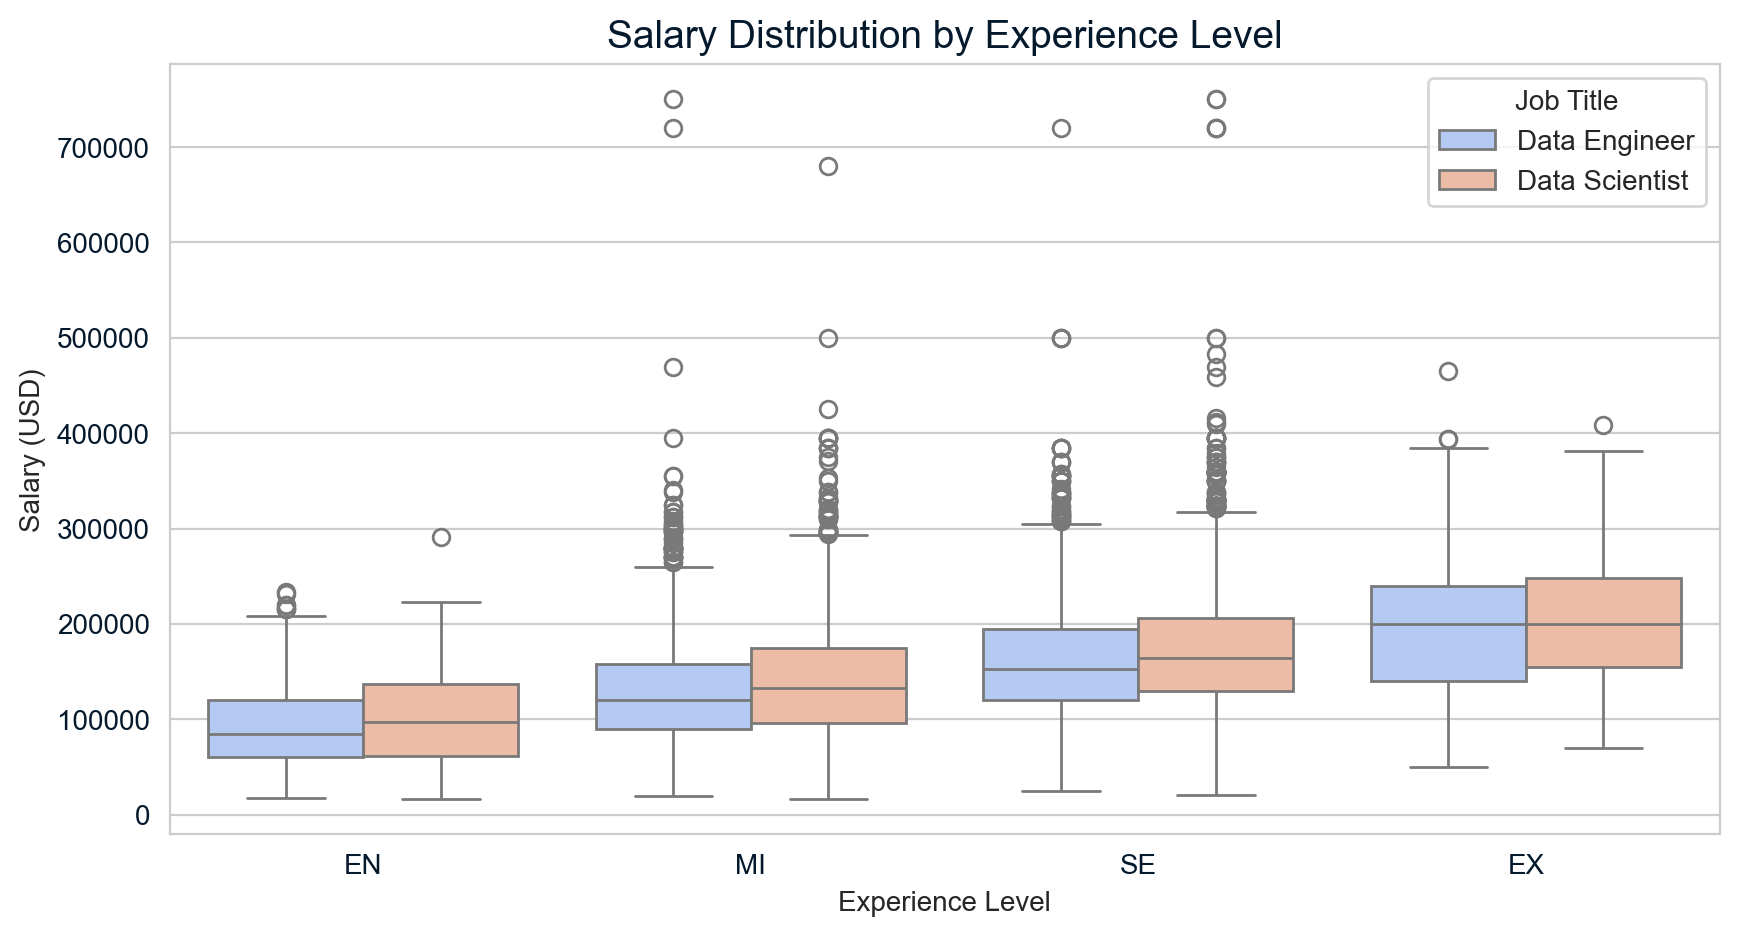

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Data Scientists and Data Engineers
filtered_df = salaries_df[salaries_df['job_title'].isin(['Data Scientist', 'Data Engineer'])]
exp_order = ['EN', 'MI', 'SE', 'EX']

# Set plot style
sns.set_style("whitegrid")

# 1. Box Plot: Salary Distribution by Experience Level
plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_df, x='experience_level', y='salary_in_usd', hue='job_title', palette="coolwarm", order = exp_order)
plt.title("Salary Distribution by Experience Level", fontsize=14)
plt.xlabel("Experience Level")
plt.ylabel("Salary (USD)")
plt.legend(title="Job Title")
plt.show()